In [2]:
library(tidyverse)

library(lubridate)
library(nycflights13)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.2
✔ tibble  2.1.1     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [3]:
today()
now()

[1] "2019-07-28"

[1] "2019-07-28 11:38:10 EDT"

In [4]:
ymd("2017-01-31")
mdy("January 31st, 2017")
dmy("31-Jan-2017")

[1] "2017-01-31"

[1] "2017-01-31"

[1] "2017-01-31"

In [7]:
ymd(20170131)

[1] "2017-01-31"

In [5]:
ymd_hms("2017-01-31 20:11:59")
mdy_hm("01/31/2017 08:01")

[1] "2017-01-31 20:11:59 UTC"

[1] "2017-01-31 08:01:00 UTC"

In [9]:
year(ymd(20170131, tz = "UTC"))

[1] 2017

In [9]:
flights %>% 
  select(year, month, day, hour, minute) %>% head

year,month,day,hour,minute
2013,1,1,5,15
2013,1,1,5,29
2013,1,1,5,40
2013,1,1,5,45
2013,1,1,6,0
2013,1,1,5,58


In [11]:
flights %>% 
  select(year, month, day, hour, minute) %>% 
  mutate(departure = make_datetime(year, month, day, hour, minute)) %>% head

year,month,day,hour,minute,departure
2013,1,1,5,15,2013-01-01 05:15:00
2013,1,1,5,29,2013-01-01 05:29:00
2013,1,1,5,40,2013-01-01 05:40:00
2013,1,1,5,45,2013-01-01 05:45:00
2013,1,1,6,0,2013-01-01 06:00:00
2013,1,1,5,58,2013-01-01 05:58:00


In [12]:
flights %>% head

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [15]:
make_datetime_100 <- function(year, month, day, time) {
  make_datetime(year, month, day, time %/% 100, time %% 100)
}

flights_dt <- flights %>% 
  filter(!is.na(dep_time), !is.na(arr_time)) %>% 
  mutate(
    dep_time = make_datetime_100(year, month, day, dep_time),
    arr_time = make_datetime_100(year, month, day, arr_time),
    sched_dep_time = make_datetime_100(year, month, day, sched_dep_time),
    sched_arr_time = make_datetime_100(year, month, day, sched_arr_time)
  ) %>% 
  select(origin, dest, ends_with("delay"), ends_with("time"))

flights_dt %>% head

origin,dest,dep_delay,arr_delay,dep_time,sched_dep_time,arr_time,sched_arr_time,air_time
EWR,IAH,2,11,2013-01-01 05:17:00,2013-01-01 05:15:00,2013-01-01 08:30:00,2013-01-01 08:19:00,227
LGA,IAH,4,20,2013-01-01 05:33:00,2013-01-01 05:29:00,2013-01-01 08:50:00,2013-01-01 08:30:00,227
JFK,MIA,2,33,2013-01-01 05:42:00,2013-01-01 05:40:00,2013-01-01 09:23:00,2013-01-01 08:50:00,160
JFK,BQN,-1,-18,2013-01-01 05:44:00,2013-01-01 05:45:00,2013-01-01 10:04:00,2013-01-01 10:22:00,183
LGA,ATL,-6,-25,2013-01-01 05:54:00,2013-01-01 06:00:00,2013-01-01 08:12:00,2013-01-01 08:37:00,116
EWR,ORD,-4,12,2013-01-01 05:54:00,2013-01-01 05:58:00,2013-01-01 07:40:00,2013-01-01 07:28:00,150


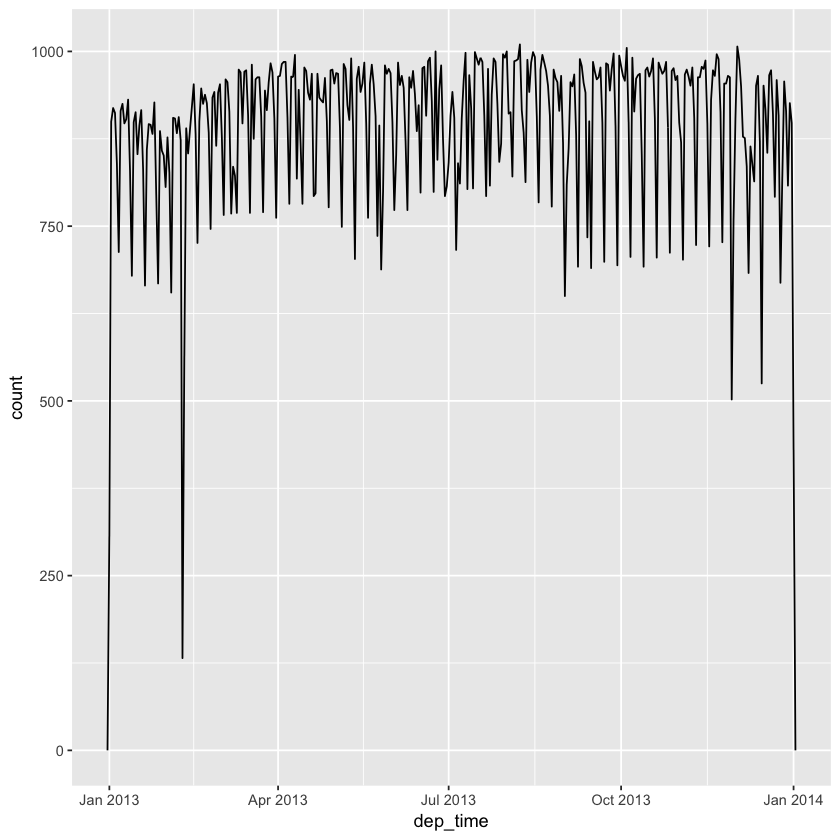

In [16]:
flights_dt %>% 
  ggplot(aes(dep_time)) + 
  geom_freqpoly(binwidth = 86400) # 86400 seconds = 1 day

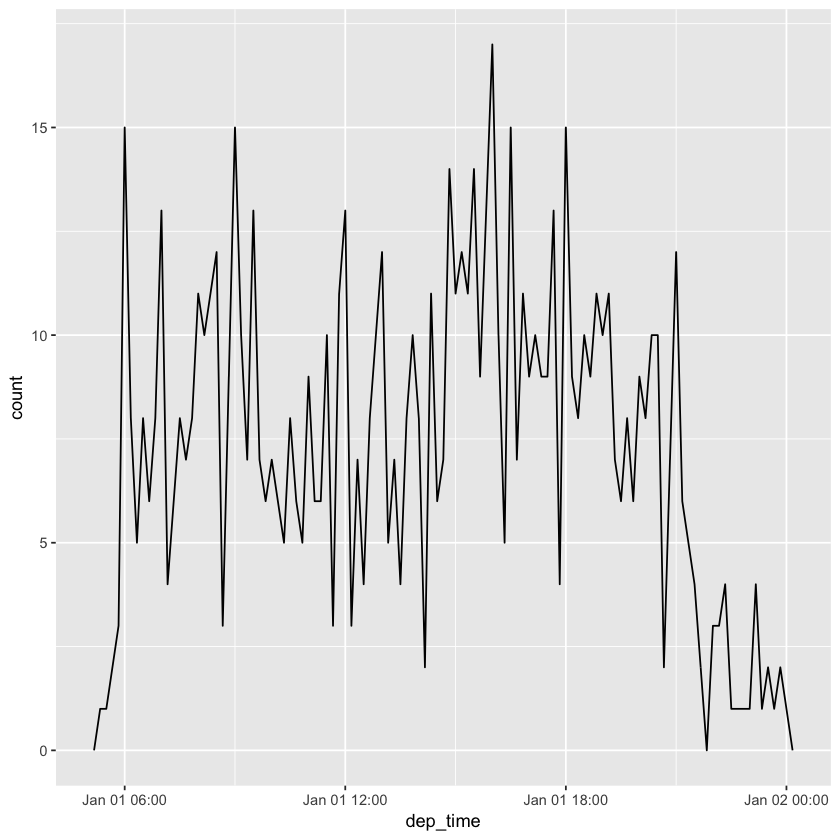

In [17]:
flights_dt %>% 
  filter(dep_time < ymd(20130102)) %>% 
  ggplot(aes(dep_time)) + 
  geom_freqpoly(binwidth = 600) # 600 s = 10 minutes

In [19]:
as_datetime(today())
as_date(now())

[1] "2019-06-21 UTC"

[1] "2019-06-21"

In [21]:
as_datetime(60 * 60 * 10)
as_date(365 * 10 + 2)  # 2 leap days <- my comment

[1] "1970-01-01 10:00:00 UTC"

[1] "1979-12-30"

In [22]:
make_datetime_100 <- function(year, month, day, time) {
  make_datetime(year, month, day, time %/% 100, time %% 100)
}

flights_dt <- flights %>%
  filter(!is.na(dep_time), !is.na(arr_time)) %>%
  mutate(
    dep_time = make_datetime_100(year, month, day, dep_time),
    arr_time = make_datetime_100(year, month, day, arr_time),
    sched_dep_time = make_datetime_100(year, month, day, sched_dep_time),
    sched_arr_time = make_datetime_100(year, month, day, sched_arr_time)
  ) %>%
  select(origin, dest, ends_with("delay"), ends_with("time"))

In [23]:
ymd(c("2010-10-10", "bananas"))

Warning message:
“ 1 failed to parse.”

[1] "2010-10-10" NA

In [25]:
ret <- ymd(c("2010-10-10", "bananas"))
print(class(ret))
ret

Warning message:
“ 1 failed to parse.”

[1] "Date"


[1] "2010-10-10" NA

In [26]:
d1 <- "January 1, 2010"
d2 <- "2015-Mar-07"
d3 <- "06-Jun-2017"
d4 <- c("August 19 (2015)", "July 1 (2015)")
d5 <- "12/30/14" # Dec 30, 2014

In [27]:
mdy(d1)
ymd(d2)
dmy(d3)
mdy(d4)
mdy(d5)

[1] "2010-01-01"

[1] "2015-03-07"

[1] "2017-06-06"

[1] "2015-08-19" "2015-07-01"

[1] "2014-12-30"

In [29]:
datetime <- ymd_hms("2016-07-08 12:34:56")
datetime

[1] "2016-07-08 12:34:56 UTC"

In [46]:
datetime <- ymd_hms("2016-07-08 12:34:56")

year(datetime)
month(datetime)
month(datetime, label = TRUE)
month(datetime, label = TRUE, abbr = FALSE)
mday(datetime)

yday(datetime)
wday(datetime)
wday(datetime, label = TRUE, abbr = FALSE)
wday(datetime, label = TRUE)

hour(datetime)
minute(datetime)
second(datetime)

[1] 2016

[1] 7

[1] Jul
12 Levels: Jan < Feb < Mar < Apr < May < Jun < Jul < Aug < Sep < ... < Dec

[1] July
12 Levels: January < February < March < April < May < June < ... < December

[1] 8

[1] 190

[1] 6

[1] Friday
7 Levels: Sunday < Monday < Tuesday < Wednesday < Thursday < ... < Saturday

[1] Fri
Levels: Sun < Mon < Tue < Wed < Thu < Fri < Sat

[1] 12

[1] 34

[1] 56

In [31]:
month(datetime, label = TRUE)
wday(datetime, label = TRUE, abbr = FALSE)

[1] Jul
12 Levels: Jan < Feb < Mar < Apr < May < Jun < Jul < Aug < Sep < ... < Dec

[1] Friday
7 Levels: Sunday < Monday < Tuesday < Wednesday < Thursday < ... < Saturday

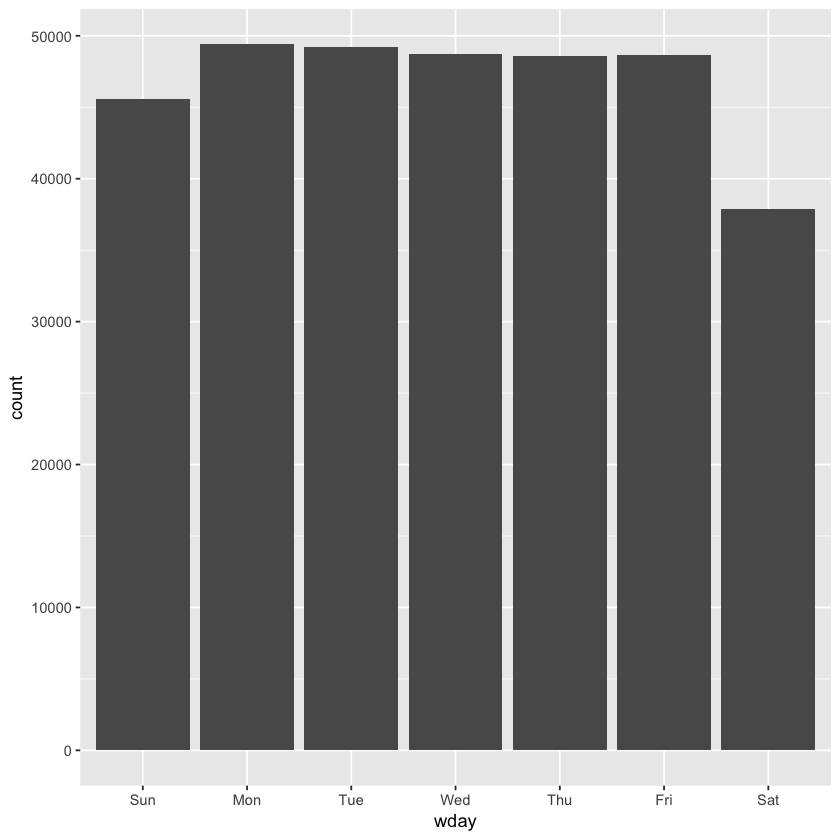

In [32]:
flights_dt %>% 
  mutate(wday = wday(dep_time, label = TRUE)) %>% 
  ggplot(aes(x = wday)) +
    geom_bar()

In [47]:
flights_dt %>% 
  mutate(minute = minute(dep_time)) %>% 
  group_by(minute) %>% 
  summarise(
    avg_delay = mean(arr_delay, na.rm = TRUE),
    n = n()) %>% head()

minute,avg_delay,n
0,5.260955,7160
1,8.936702,5256
2,9.594860,5110
3,9.185745,5105
4,10.460457,4916
5,8.818539,5106


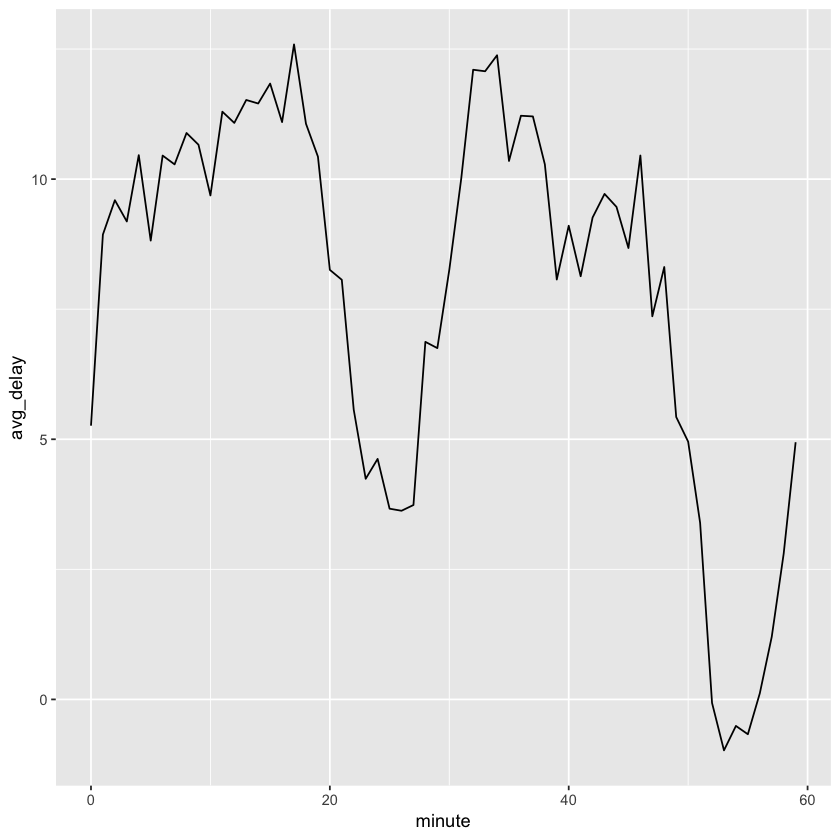

In [33]:
flights_dt %>% 
  mutate(minute = minute(dep_time)) %>% 
  group_by(minute) %>% 
  summarise(
    avg_delay = mean(arr_delay, na.rm = TRUE),
    n = n()) %>% 
  ggplot(aes(minute, avg_delay)) +
    geom_line()

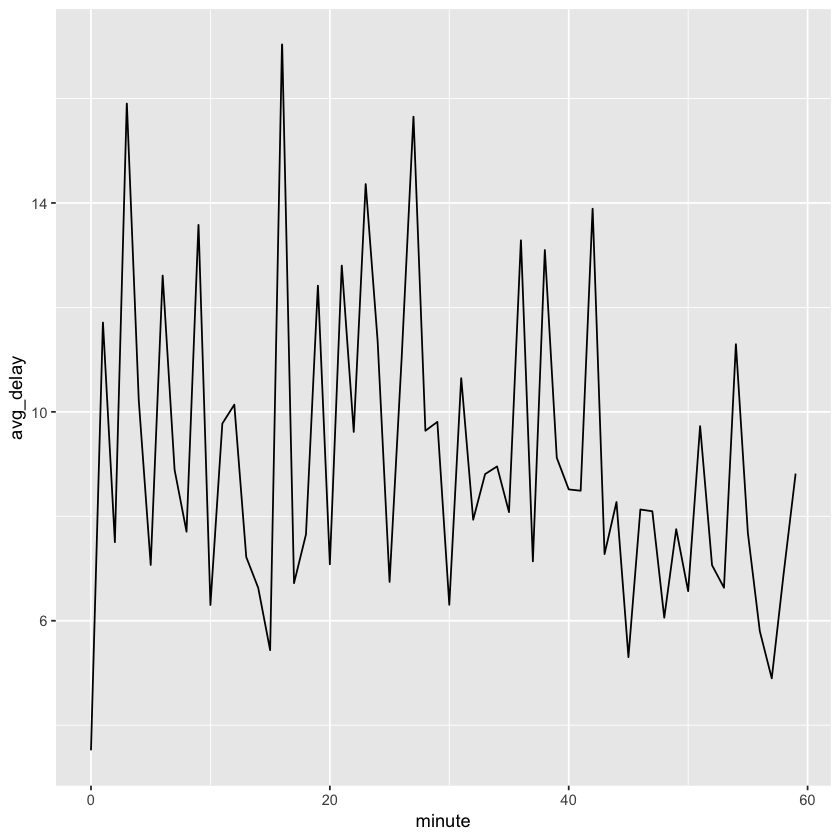

In [34]:
sched_dep <- flights_dt %>% 
  mutate(minute = minute(sched_dep_time)) %>% 
  group_by(minute) %>% 
  summarise(
    avg_delay = mean(arr_delay, na.rm = TRUE),
    n = n())

ggplot(sched_dep, aes(minute, avg_delay)) +
  geom_line()

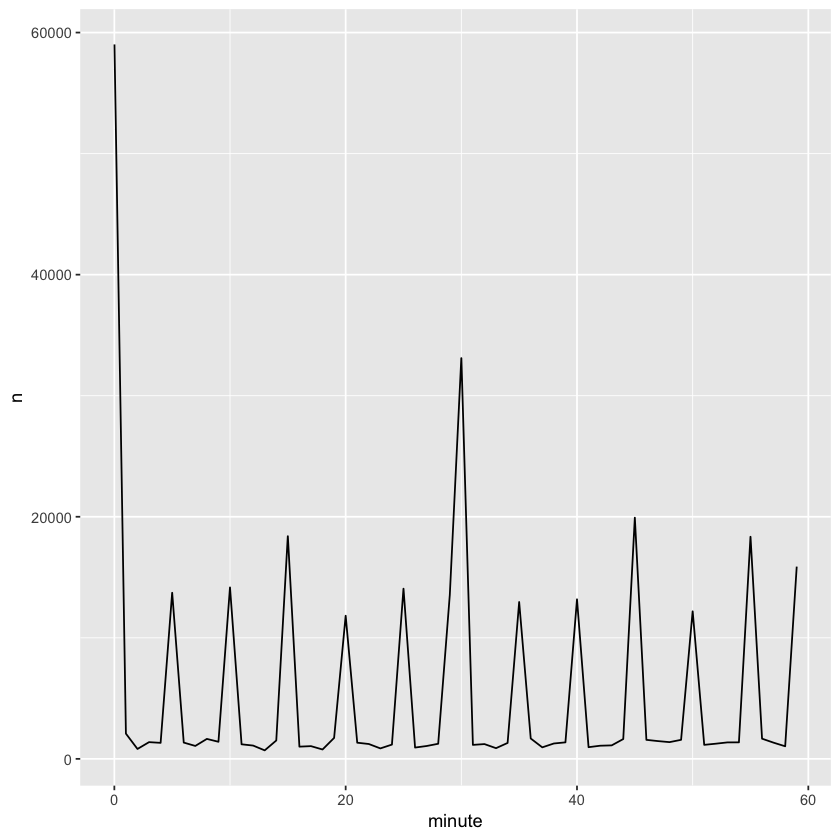

In [35]:
ggplot(sched_dep, aes(minute, n)) +
  geom_line()

In [52]:
flights_dt %>% 
  count(week = floor_date(dep_time, "week")) %>% head
flights_dt %>% 
  count(week = floor_date(dep_time, "month")) %>% head

week,n
2012-12-30,4300
2013-01-06,6082
2013-01-13,5976
2013-01-20,5925
2013-01-27,5774
2013-02-03,5160


week,n
2013-01-01,26468
2013-02-01,23660
2013-03-01,27943
2013-04-01,27620
2013-05-01,28195
2013-06-01,27171


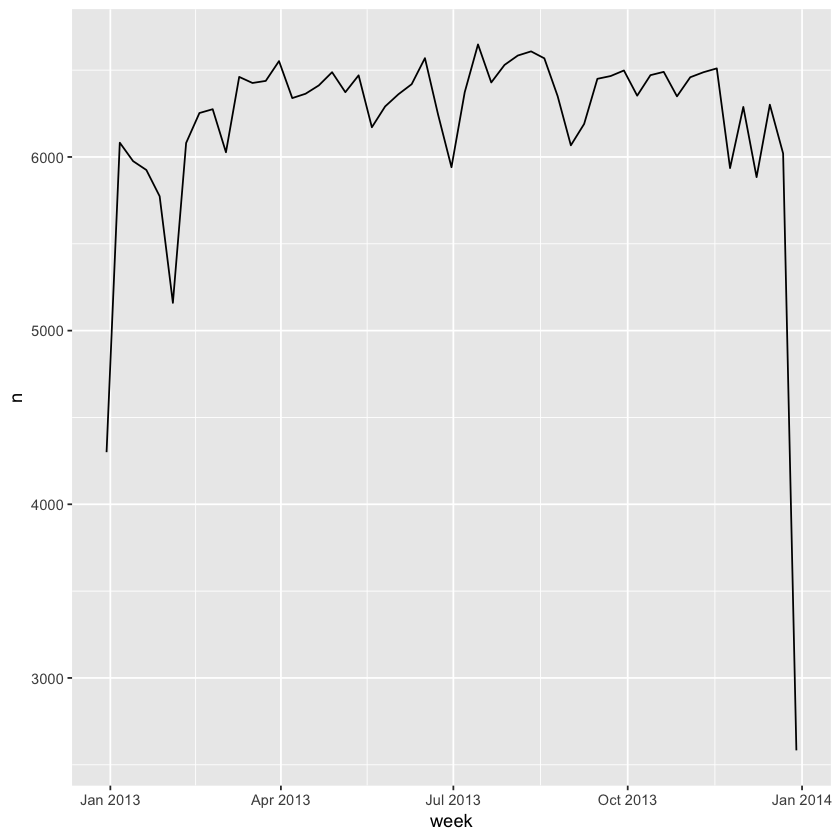

In [48]:
flights_dt %>% 
  count(week = floor_date(dep_time, "week")) %>% 
  ggplot(aes(week, n)) +
    geom_line()

In [36]:
(datetime <- ymd_hms("2016-07-08 12:34:56"))

year(datetime) <- 2020
datetime
month(datetime) <- 01
datetime
hour(datetime) <- hour(datetime) + 1
datetime

[1] "2016-07-08 12:34:56 UTC"

[1] "2020-07-08 12:34:56 UTC"

[1] "2020-01-08 12:34:56 UTC"

[1] "2020-01-08 13:34:56 UTC"

In [37]:
update(datetime, year = 2020, month = 2, mday = 2, hour = 2)

[1] "2020-02-02 02:34:56 UTC"

In [38]:
ymd("2015-02-01") %>% 
  update(mday = 30)
ymd("2015-02-01") %>% 
  update(hour = 400)

[1] "2015-03-02"

[1] "2015-02-17 16:00:00 UTC"

In [56]:
flights_dt %>% 
  mutate(dep_hour = update(dep_time, yday = 1)) %>% head

origin,dest,dep_delay,arr_delay,dep_time,sched_dep_time,arr_time,sched_arr_time,air_time,dep_hour
EWR,IAH,2,11,2013-01-01 05:17:00,2013-01-01 05:15:00,2013-01-01 08:30:00,2013-01-01 08:19:00,227,2013-01-01 05:17:00
LGA,IAH,4,20,2013-01-01 05:33:00,2013-01-01 05:29:00,2013-01-01 08:50:00,2013-01-01 08:30:00,227,2013-01-01 05:33:00
JFK,MIA,2,33,2013-01-01 05:42:00,2013-01-01 05:40:00,2013-01-01 09:23:00,2013-01-01 08:50:00,160,2013-01-01 05:42:00
JFK,BQN,-1,-18,2013-01-01 05:44:00,2013-01-01 05:45:00,2013-01-01 10:04:00,2013-01-01 10:22:00,183,2013-01-01 05:44:00
LGA,ATL,-6,-25,2013-01-01 05:54:00,2013-01-01 06:00:00,2013-01-01 08:12:00,2013-01-01 08:37:00,116,2013-01-01 05:54:00
EWR,ORD,-4,12,2013-01-01 05:54:00,2013-01-01 05:58:00,2013-01-01 07:40:00,2013-01-01 07:28:00,150,2013-01-01 05:54:00


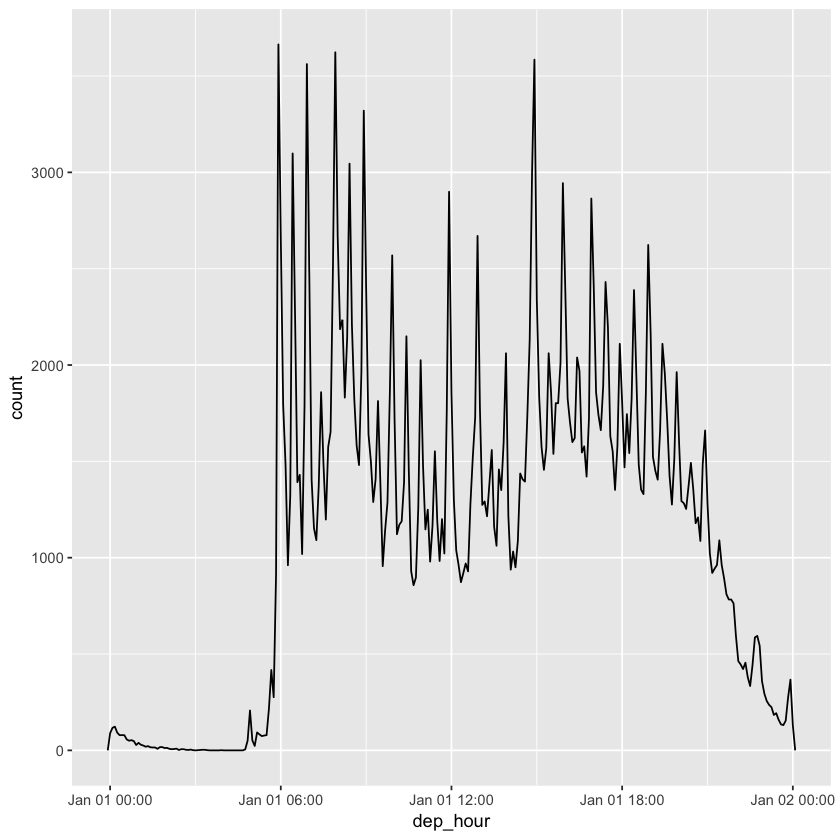

In [59]:
flights_dt %>% 
  mutate(dep_hour = update(dep_time, yday = 1)) %>% 
  ggplot(aes(dep_hour)) +
    geom_freqpoly(binwidth = 300)

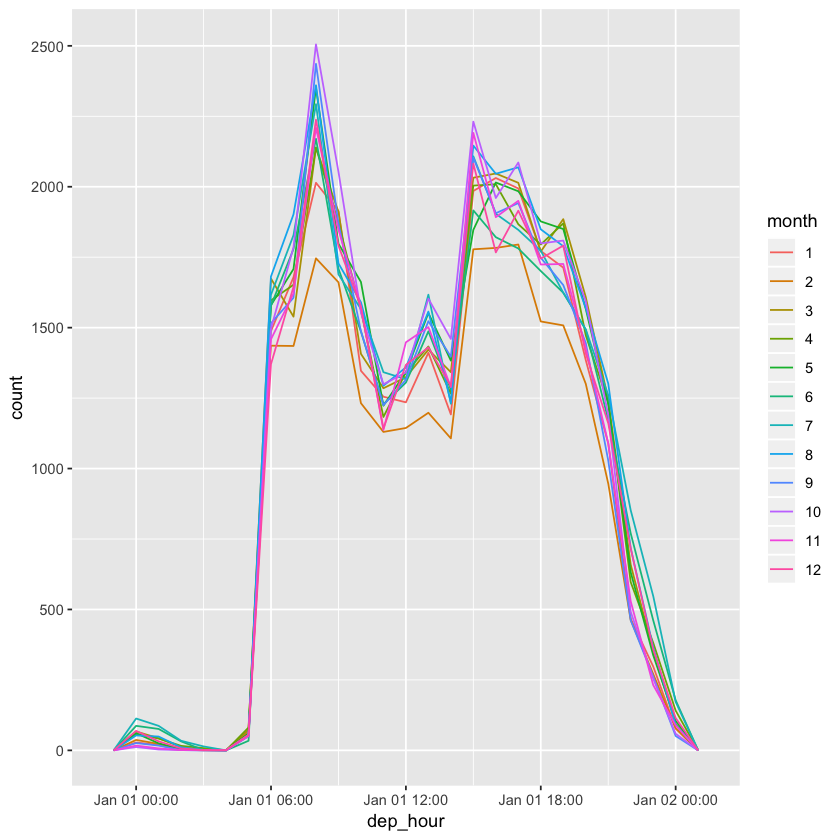

In [60]:
flights_dt %>%
  filter(!is.na(dep_time)) %>%
  mutate(dep_hour = update(dep_time, yday = 1)) %>%
  mutate(month = factor(month(dep_time))) %>%
  ggplot(aes(dep_hour, color = month)) +
  geom_freqpoly(binwidth = 60 * 60)

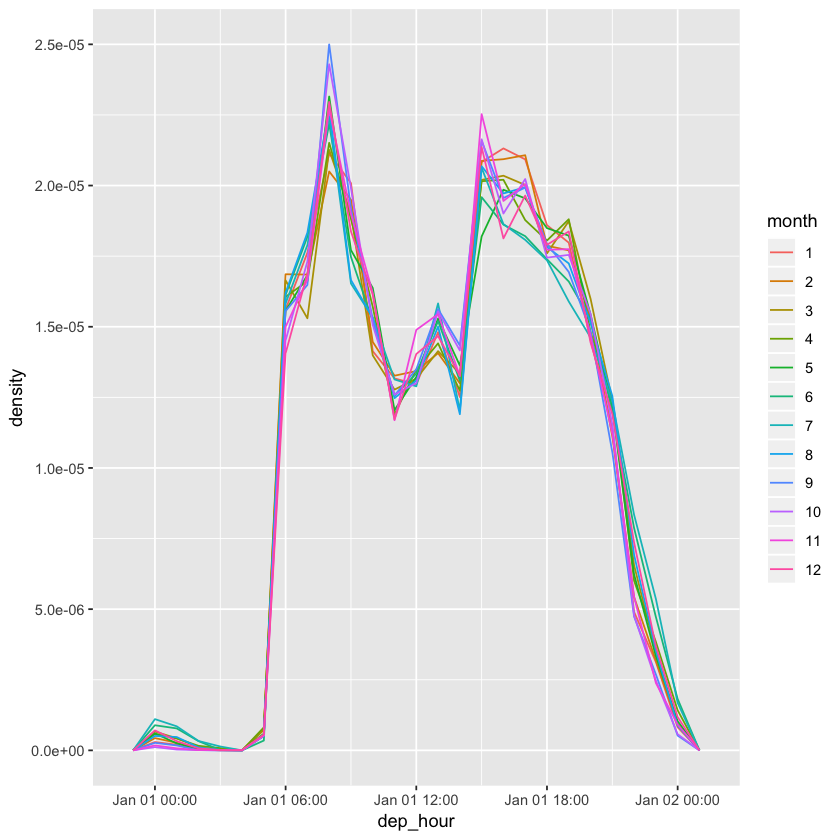

In [61]:
flights_dt %>%
  filter(!is.na(dep_time)) %>%
  mutate(dep_hour = update(dep_time, yday = 1)) %>%
  mutate(month = factor(month(dep_time))) %>%
  ggplot(aes(dep_hour, color = month)) +
  geom_freqpoly(aes(y = ..density..), binwidth = 60 * 60)

In [62]:
flights_dt %>%
  mutate(dep_time_ = sched_dep_time + dep_delay * 60) %>%
  filter(dep_time_ != dep_time) %>%
  select(dep_time_, dep_time, sched_dep_time, dep_delay)

dep_time_,dep_time,sched_dep_time,dep_delay
2013-01-02 08:48:00,2013-01-01 08:48:00,2013-01-01 18:35:00,853
2013-01-03 00:42:00,2013-01-02 00:42:00,2013-01-02 23:59:00,43
2013-01-03 01:26:00,2013-01-02 01:26:00,2013-01-02 22:50:00,156
2013-01-04 00:32:00,2013-01-03 00:32:00,2013-01-03 23:59:00,33
2013-01-04 00:50:00,2013-01-03 00:50:00,2013-01-03 21:45:00,185
2013-01-04 02:35:00,2013-01-03 02:35:00,2013-01-03 23:59:00,156
2013-01-05 00:25:00,2013-01-04 00:25:00,2013-01-04 23:59:00,26
2013-01-05 01:06:00,2013-01-04 01:06:00,2013-01-04 22:45:00,141
2013-01-06 00:14:00,2013-01-05 00:14:00,2013-01-05 23:59:00,15
2013-01-06 00:37:00,2013-01-05 00:37:00,2013-01-05 22:30:00,127


In [63]:
flights_dt %>%
  mutate(
    flight_duration = as.numeric(arr_time - dep_time),
    air_time_mins = air_time,
    diff = flight_duration - air_time_mins
  ) %>%
  select(origin, dest, flight_duration, air_time_mins, diff)

origin,dest,flight_duration,air_time_mins,diff
EWR,IAH,193,227,-34
LGA,IAH,197,227,-30
JFK,MIA,221,160,61
JFK,BQN,260,183,77
LGA,ATL,138,116,22
EWR,ORD,106,150,-44
EWR,FLL,198,158,40
LGA,IAD,72,53,19
JFK,MCO,161,140,21
LGA,ORD,115,138,-23


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


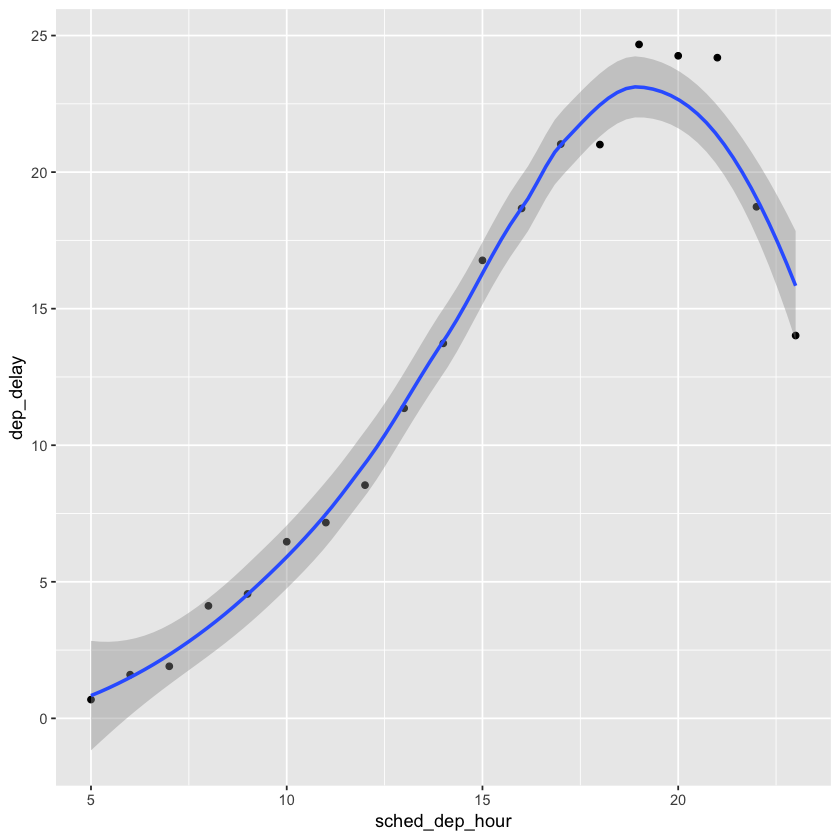

In [64]:
flights_dt %>%
  mutate(sched_dep_hour = hour(sched_dep_time)) %>%
  group_by(sched_dep_hour) %>%
  summarise(dep_delay = mean(dep_delay)) %>%
  ggplot(aes(y = dep_delay, x = sched_dep_hour)) +
  geom_point() +
  geom_smooth()

In [65]:
flights_dt %>%
  mutate(dow = wday(sched_dep_time)) %>%
  group_by(dow) %>%
  summarise(
    dep_delay = mean(dep_delay),
    arr_delay = mean(arr_delay, na.rm = TRUE)
  ) %>%
  print(n = Inf)

# A tibble: 7 x 3
    dow dep_delay arr_delay
  <dbl>     <dbl>     <dbl>
1     1     11.5       4.82
2     2     14.7       9.65
3     3     10.6       5.39
4     4     11.7       7.05
5     5     16.1      11.7 
6     6     14.7       9.07
7     7      7.62     -1.45


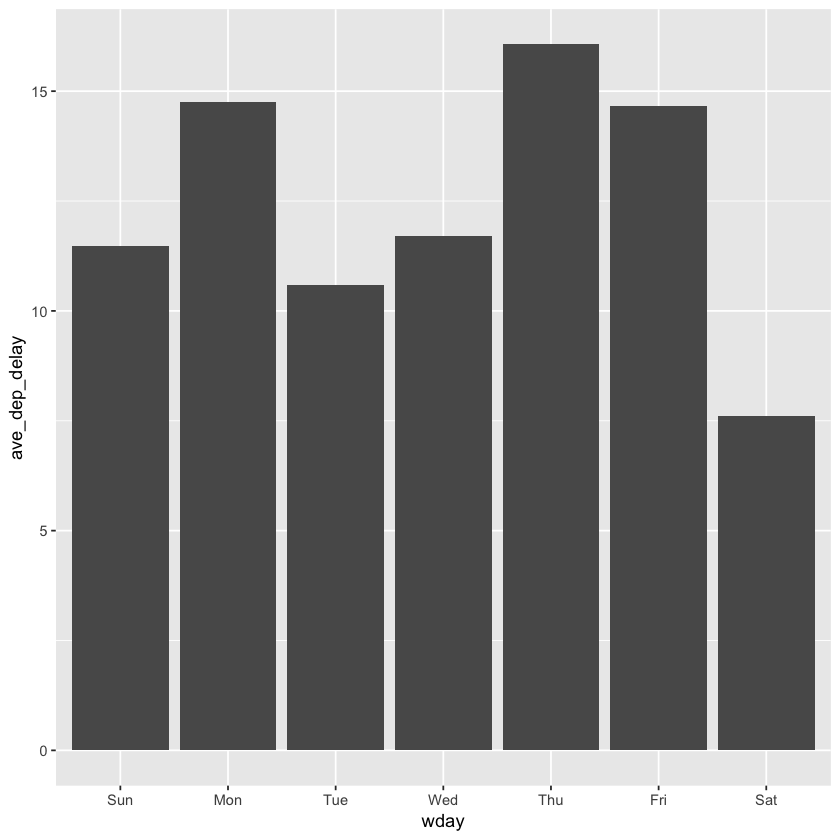

In [66]:
flights_dt %>%
  mutate(wday = wday(dep_time, label = TRUE)) %>%
  group_by(wday) %>%
  summarize(ave_dep_delay = mean(dep_delay, na.rm = TRUE)) %>%
  ggplot(aes(x = wday, y = ave_dep_delay)) +
  geom_bar(stat = "identity")

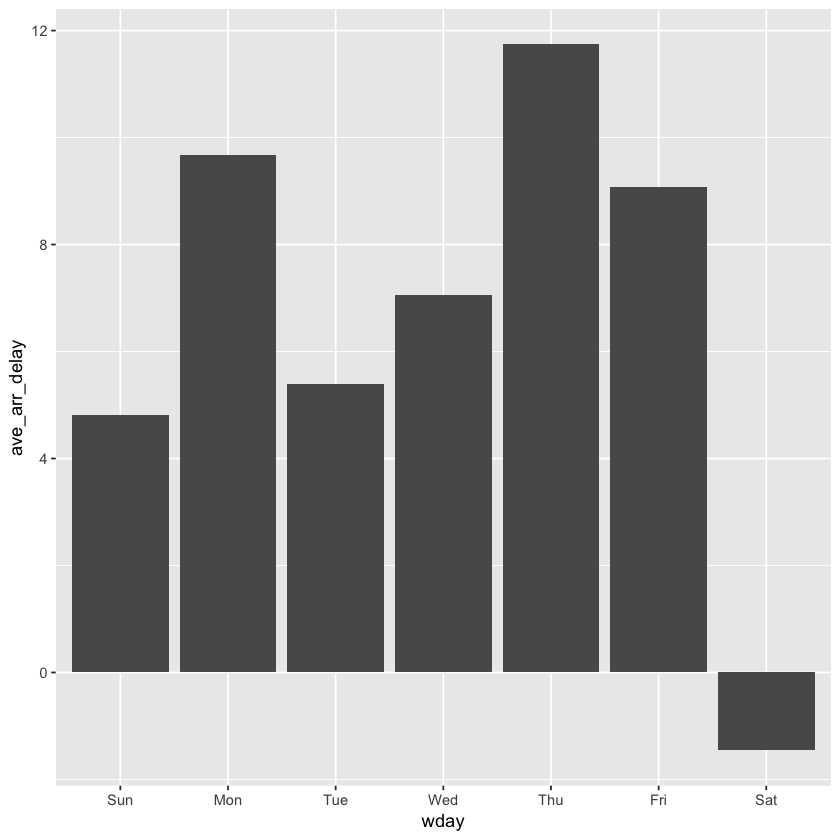

In [67]:
flights_dt %>%
  mutate(wday = wday(dep_time, label = TRUE)) %>%
  group_by(wday) %>%
  summarize(ave_arr_delay = mean(arr_delay, na.rm = TRUE)) %>%
  ggplot(aes(x = wday, y = ave_arr_delay)) +
  geom_bar(stat = "identity")

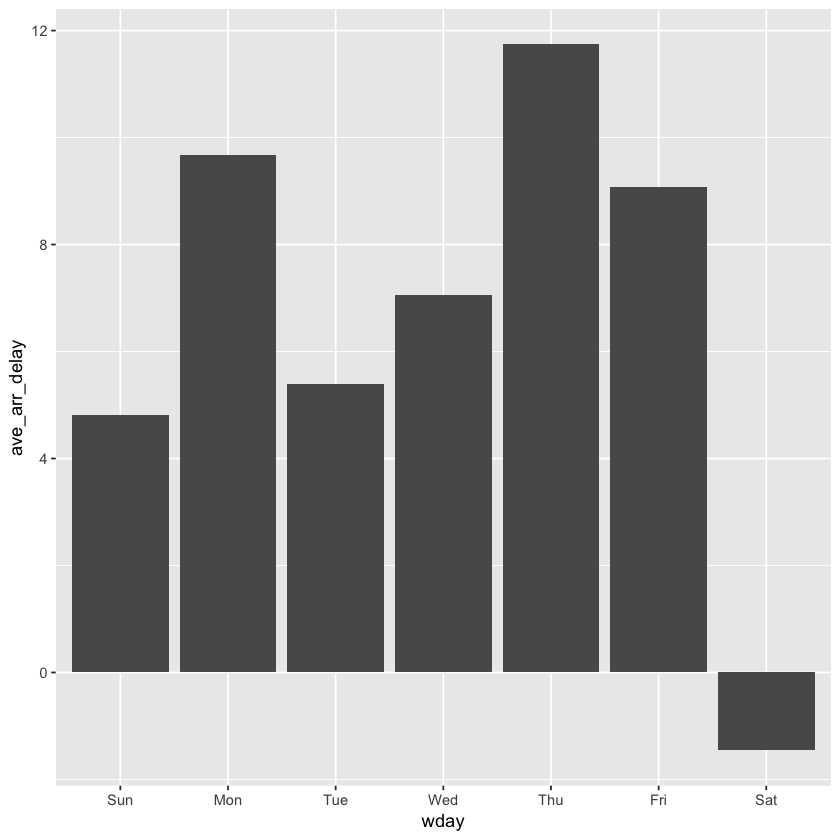

In [68]:
flights_dt %>%
  mutate(wday = wday(dep_time, label = TRUE)) %>%
  group_by(wday) %>%
  summarize(ave_arr_delay = mean(arr_delay, na.rm = TRUE)) %>%
  ggplot(aes(x = wday, y = ave_arr_delay)) +
  geom_bar(stat = "identity")

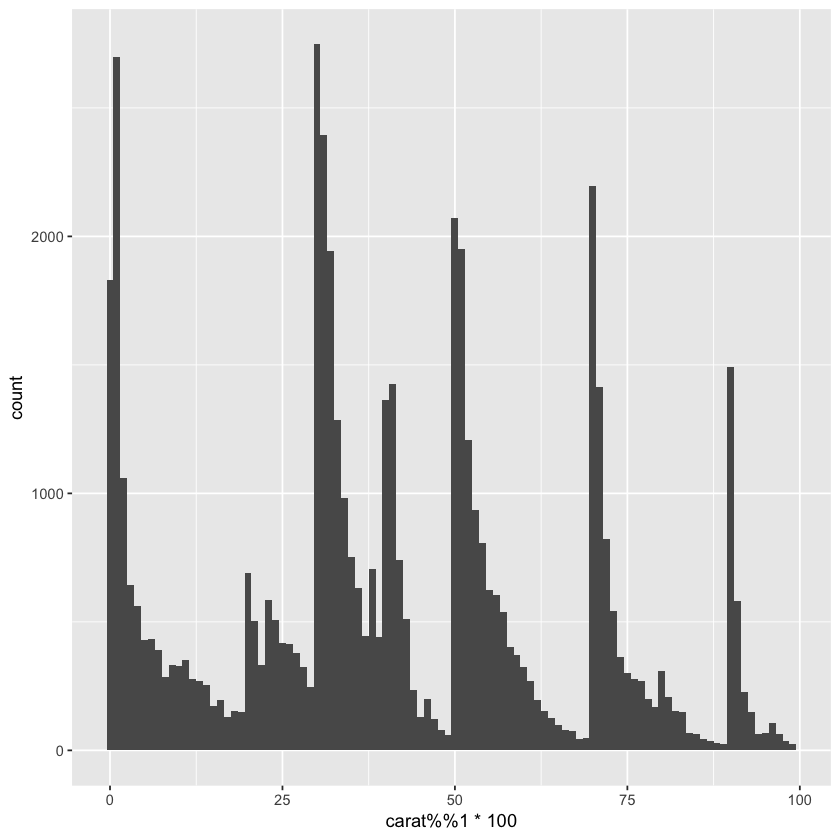

In [69]:
ggplot(diamonds, aes(x = carat %% 1 * 100)) +
  geom_histogram(binwidth = 1)

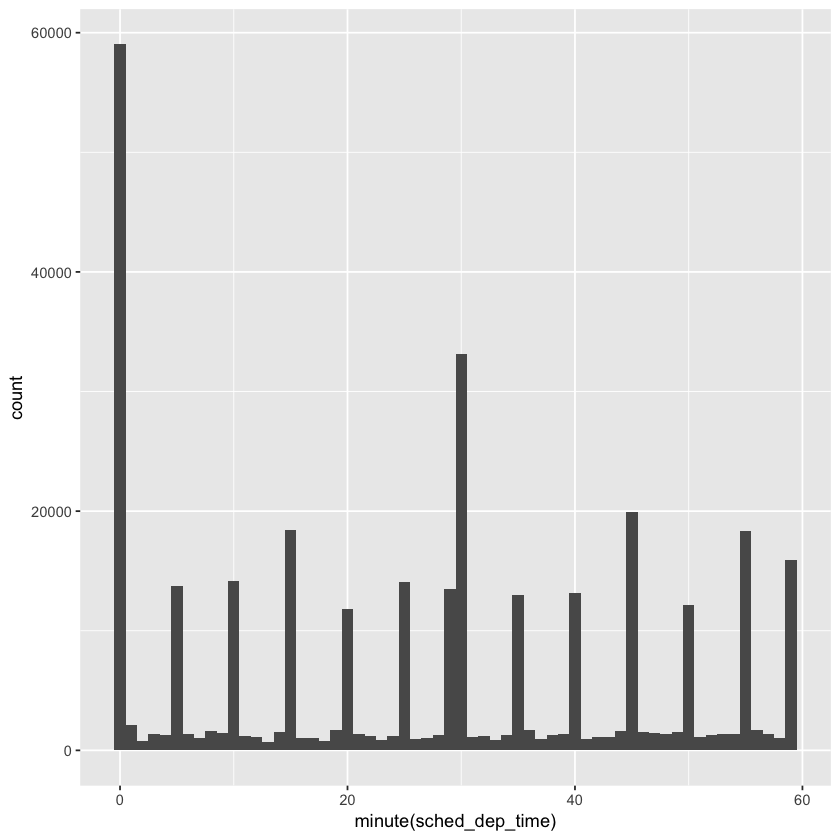

In [70]:
ggplot(flights_dt, aes(x = minute(sched_dep_time))) +
  geom_histogram(binwidth = 1)

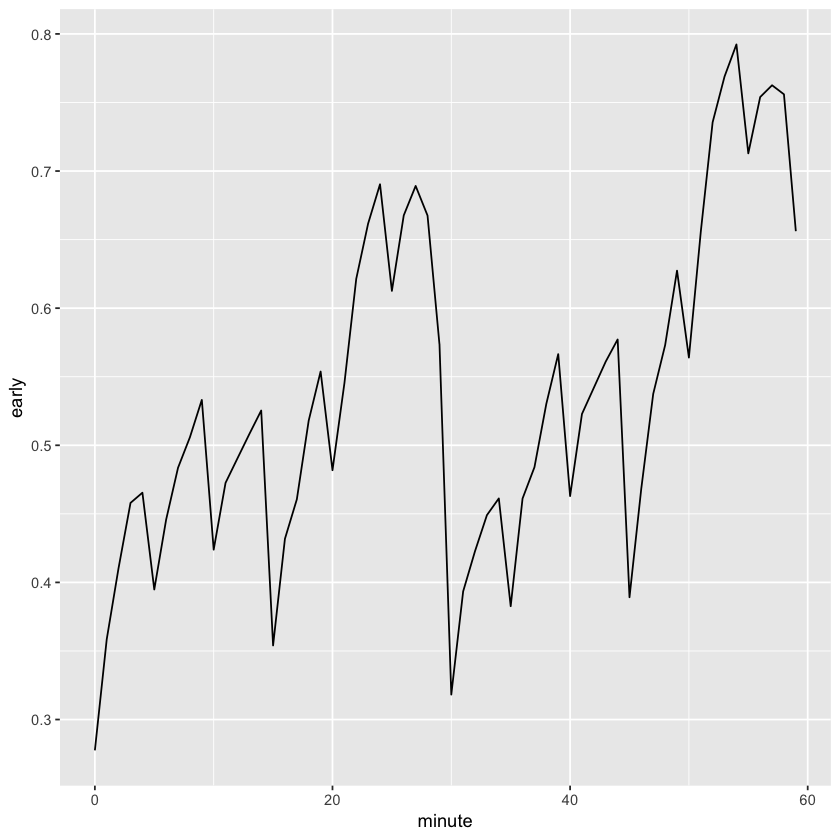

In [71]:
flights_dt %>%
  mutate(
    minute = minute(dep_time),
    early = dep_delay < 0
  ) %>%
  group_by(minute) %>%
  summarise(
    early = mean(early, na.rm = TRUE),
    n = n()
  ) %>%
  ggplot(aes(minute, early)) +
  geom_line()

In [82]:
today()-ymd(19611016)
dseconds(61)

Time difference of 21067 days

[1] "61s (~1.02 minutes)"

In [75]:
# How old is Hadley?
h_age <- today() - ymd(19791014)
h_age

Time difference of 14495 days

In [73]:
as.duration(h_age)

[1] "1252368000s (~39.69 years)"

In [74]:
dseconds(15)
dminutes(10)
dhours(c(12, 24))
ddays(0:5)
dweeks(3)
dyears(1)

[1] "15s"

[1] "600s (~10 minutes)"

[1] "43200s (~12 hours)" "86400s (~1 days)"

[1] "0s"                "86400s (~1 days)"  "172800s (~2 days)"
[4] "259200s (~3 days)" "345600s (~4 days)" "432000s (~5 days)"

[1] "1814400s (~3 weeks)"

[1] "31536000s (~52.14 weeks)"

In [83]:
2 * dyears(1)
dyears(1) + dweeks(12) + dhours(15)

[1] "63072000s (~2 years)"

[1] "38847600s (~1.23 years)"

In [84]:
tomorrow <- today() + ddays(1)
last_year <- today() - dyears(1)

In [85]:
one_pm <- ymd_hms("2016-03-12 13:00:00", tz = "America/New_York")

one_pm
one_pm + ddays(1)

[1] "2016-03-12 13:00:00 EST"

[1] "2016-03-13 14:00:00 EDT"

In [86]:
one_pm
one_pm + days(1)

[1] "2016-03-12 13:00:00 EST"

[1] "2016-03-13 13:00:00 EDT"

In [87]:
seconds(15)
minutes(10)
hours(c(12, 24))
days(7)
months(1:6)
weeks(3)
years(1)

[1] "15S"

[1] "10M 0S"

[1] "12H 0M 0S" "24H 0M 0S"

[1] "7d 0H 0M 0S"

[1] "1m 0d 0H 0M 0S" "2m 0d 0H 0M 0S" "3m 0d 0H 0M 0S" "4m 0d 0H 0M 0S"
[5] "5m 0d 0H 0M 0S" "6m 0d 0H 0M 0S"

[1] "21d 0H 0M 0S"

[1] "1y 0m 0d 0H 0M 0S"

In [88]:
10 * (months(6) + days(1))
days(50) + hours(25) + minutes(2)

[1] "60m 10d 0H 0M 0S"

[1] "50d 25H 2M 0S"

In [89]:
# A leap year
ymd("2016-01-01") + dyears(1)
ymd("2016-01-01") + years(1)

# Daylight Savings Time
one_pm + ddays(1)
one_pm + days(1)

[1] "2016-12-31"

[1] "2017-01-01"

[1] "2016-03-13 14:00:00 EDT"

[1] "2016-03-13 13:00:00 EDT"

In [90]:
flights_dt %>% 
  filter(arr_time < dep_time) 

origin,dest,dep_delay,arr_delay,dep_time,sched_dep_time,arr_time,sched_arr_time,air_time
EWR,BQN,9,-4,2013-01-01 19:29:00,2013-01-01 19:20:00,2013-01-01 00:03:00,2013-01-01 00:07:00,192
JFK,DFW,59,NA,2013-01-01 19:39:00,2013-01-01 18:40:00,2013-01-01 00:29:00,2013-01-01 21:51:00,NA
EWR,TPA,-2,9,2013-01-01 20:58:00,2013-01-01 21:00:00,2013-01-01 00:08:00,2013-01-01 23:59:00,159
EWR,SJU,-6,-12,2013-01-01 21:02:00,2013-01-01 21:08:00,2013-01-01 01:46:00,2013-01-01 01:58:00,199
EWR,SFO,11,-14,2013-01-01 21:08:00,2013-01-01 20:57:00,2013-01-01 00:25:00,2013-01-01 00:39:00,354
LGA,FLL,-10,-2,2013-01-01 21:20:00,2013-01-01 21:30:00,2013-01-01 00:16:00,2013-01-01 00:18:00,160
EWR,MCO,41,43,2013-01-01 21:21:00,2013-01-01 20:40:00,2013-01-01 00:06:00,2013-01-01 23:23:00,143
JFK,LAX,-7,-24,2013-01-01 21:28:00,2013-01-01 21:35:00,2013-01-01 00:26:00,2013-01-01 00:50:00,338
EWR,FLL,49,28,2013-01-01 21:34:00,2013-01-01 20:45:00,2013-01-01 00:20:00,2013-01-01 23:52:00,152
EWR,FLL,-9,-14,2013-01-01 21:36:00,2013-01-01 21:45:00,2013-01-01 00:25:00,2013-01-01 00:39:00,154


In [93]:
flights_dt <- flights_dt %>% 
  mutate(
    overnight = arr_time < dep_time,
    arr_time = arr_time + days(overnight * 1),
    sched_arr_time = sched_arr_time + days(overnight * 1)
  )
flights_dt

origin,dest,dep_delay,arr_delay,dep_time,sched_dep_time,arr_time,sched_arr_time,air_time,overnight
EWR,IAH,2,11,2013-01-01 05:17:00,2013-01-01 05:15:00,2013-01-01 08:30:00,2013-01-01 08:19:00,227,FALSE
LGA,IAH,4,20,2013-01-01 05:33:00,2013-01-01 05:29:00,2013-01-01 08:50:00,2013-01-01 08:30:00,227,FALSE
JFK,MIA,2,33,2013-01-01 05:42:00,2013-01-01 05:40:00,2013-01-01 09:23:00,2013-01-01 08:50:00,160,FALSE
JFK,BQN,-1,-18,2013-01-01 05:44:00,2013-01-01 05:45:00,2013-01-01 10:04:00,2013-01-01 10:22:00,183,FALSE
LGA,ATL,-6,-25,2013-01-01 05:54:00,2013-01-01 06:00:00,2013-01-01 08:12:00,2013-01-01 08:37:00,116,FALSE
EWR,ORD,-4,12,2013-01-01 05:54:00,2013-01-01 05:58:00,2013-01-01 07:40:00,2013-01-01 07:28:00,150,FALSE
EWR,FLL,-5,19,2013-01-01 05:55:00,2013-01-01 06:00:00,2013-01-01 09:13:00,2013-01-01 08:54:00,158,FALSE
LGA,IAD,-3,-14,2013-01-01 05:57:00,2013-01-01 06:00:00,2013-01-01 07:09:00,2013-01-01 07:23:00,53,FALSE
JFK,MCO,-3,-8,2013-01-01 05:57:00,2013-01-01 06:00:00,2013-01-01 08:38:00,2013-01-01 08:46:00,140,FALSE
LGA,ORD,-2,8,2013-01-01 05:58:00,2013-01-01 06:00:00,2013-01-01 07:53:00,2013-01-01 07:45:00,138,FALSE


In [94]:
flights_dt %>% 
  filter(overnight, arr_time < dep_time) 

origin,dest,dep_delay,arr_delay,dep_time,sched_dep_time,arr_time,sched_arr_time,air_time,overnight


In [95]:
years(1) / days(1)

estimate only: convert to intervals for accuracy


[1] 365.25

In [96]:
next_year <- today() + years(1)
(today() %--% next_year) / ddays(1)

[1] 366

In [97]:
(today() %--% next_year) %/% days(1)

Note: method with signature ‘Timespan#Timespan’ chosen for function ‘%/%’,
 target signature ‘Interval#Period’.
 "Interval#ANY", "ANY#Period" would also be valid


[1] 366

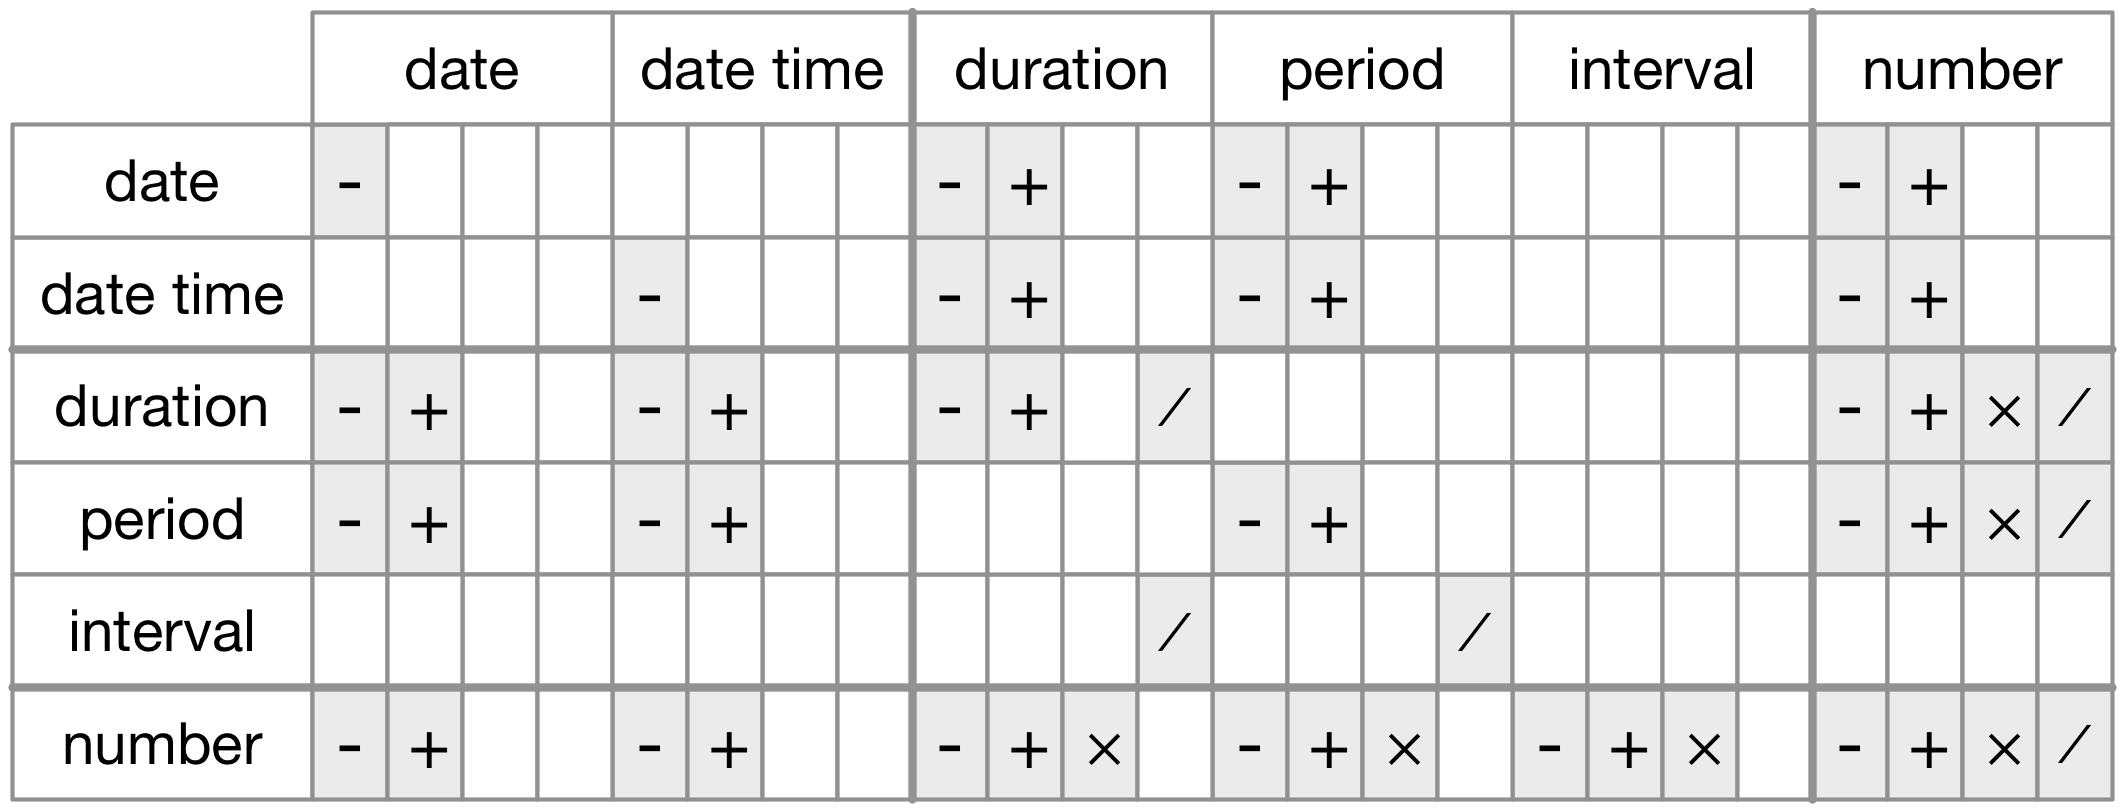

In [98]:
ymd("2015-01-01") + months(0:11)

[1] "2015-01-01" "2015-02-01" "2015-03-01" "2015-04-01" "2015-05-01"
 [6] "2015-06-01" "2015-07-01" "2015-08-01" "2015-09-01" "2015-10-01"
[11] "2015-11-01" "2015-12-01"

In [99]:
floor_date(today(), unit = "year") + months(0:11)

[1] "2019-01-01" "2019-02-01" "2019-03-01" "2019-04-01" "2019-05-01"
 [6] "2019-06-01" "2019-07-01" "2019-08-01" "2019-09-01" "2019-10-01"
[11] "2019-11-01" "2019-12-01"

In [100]:
age <- function(bday) {
  (bday %--% today()) %/% years(1)
}
age(ymd("1990-10-12"))

[1] 28

In [101]:
(today() %--% (today() + years(1))) / months(1)

[1] 12

In [ ]:
(today() %--% (today() + years(1))) %/% months(1)

In [ ]:
(today() %--% (today() + years(1))) / days(30)

In [ ]:
as.Date("2016-02-29") + years(1)

In [103]:
Sys.timezone()

[1] "America/New_York"

In [104]:
length(OlsonNames())
head(OlsonNames())

[1] 594

[1] "Africa/Abidjan"     "Africa/Accra"       "Africa/Addis_Ababa"
[4] "Africa/Algiers"     "Africa/Asmara"      "Africa/Asmera"

In [105]:
(x1 <- ymd_hms("2015-06-01 12:00:00", tz = "America/New_York"))
(x2 <- ymd_hms("2015-06-01 18:00:00", tz = "Europe/Copenhagen"))
(x3 <- ymd_hms("2015-06-02 04:00:00", tz = "Pacific/Auckland"))

[1] "2015-06-01 12:00:00 EDT"

[1] "2015-06-01 18:00:00 CEST"

[1] "2015-06-02 04:00:00 NZST"

In [106]:
x1 - x2
x1 - x3

Time difference of 0 secs

Time difference of 0 secs

In [107]:
x4 <- c(x1, x2, x3)
x4

[1] "2015-06-01 12:00:00 EDT" "2015-06-01 12:00:00 EDT"
[3] "2015-06-01 12:00:00 EDT"

In [108]:
x4a <- with_tz(x4, tzone = "Australia/Lord_Howe")
x4a
x4a - x4

[1] "2015-06-02 02:30:00 +1030" "2015-06-02 02:30:00 +1030"
[3] "2015-06-02 02:30:00 +1030"

Time differences in secs
[1] 0 0 0

In [109]:
x4b <- force_tz(x4, tzone = "Australia/Lord_Howe")
x4b
x4b - x4

[1] "2015-06-01 12:00:00 +1030" "2015-06-01 12:00:00 +1030"
[3] "2015-06-01 12:00:00 +1030"

Time differences in hours
[1] -14.5 -14.5 -14.5